<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Romi-Introduction" data-toc-modified-id="Romi-Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Romi Introduction</a></span></li><li><span><a href="#ES302-Romi-Pin-Configuration" data-toc-modified-id="ES302-Romi-Pin-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ES302 Romi Pin Configuration</a></span></li><li><span><a href="#Basic-Interaction-with-Romi-in-Arduino" data-toc-modified-id="Basic-Interaction-with-Romi-in-Arduino-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Basic Interaction with Romi in Arduino</a></span></li><li><span><a href="#Controlling-Romi-From-a-PC" data-toc-modified-id="Controlling-Romi-From-a-PC-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Controlling Romi From a PC</a></span></li><li><span><a href="#Controlling-a-Simulated-Romi-in-Webots" data-toc-modified-id="Controlling-a-Simulated-Romi-in-Webots-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Controlling a Simulated Romi in Webots</a></span></li><li><span><a href="#Working-With-Virtual-and-Physical-Romi-Robots-in-the-Lab" data-toc-modified-id="Working-With-Virtual-and-Physical-Romi-Robots-in-the-Lab-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Working With Virtual and Physical Romi Robots in the Lab</a></span></li></ul></div>

# Romi Introduction


In this course, we will use the [Pololu Romi](https://www.pololu.com/category/203/romi-chassis-kits) Equipped with the [Robot arm kit](https://www.pololu.com/product/3550) and the [Romi 32U4 control board](https://www.pololu.com/product/3544) for mini-projects and class activities. The control board can be programmed to interact with its environment using the Arduino programming environment, which is compatible with Mac, Windows, and Linux.

Visiting the links above will give you access to a tremendous amount of detailed information about how the Romi can and should be used. This guide is only meant to be a brief introduction, and focuses on the things about the Romis at Lafayette's robotics lab that are different.

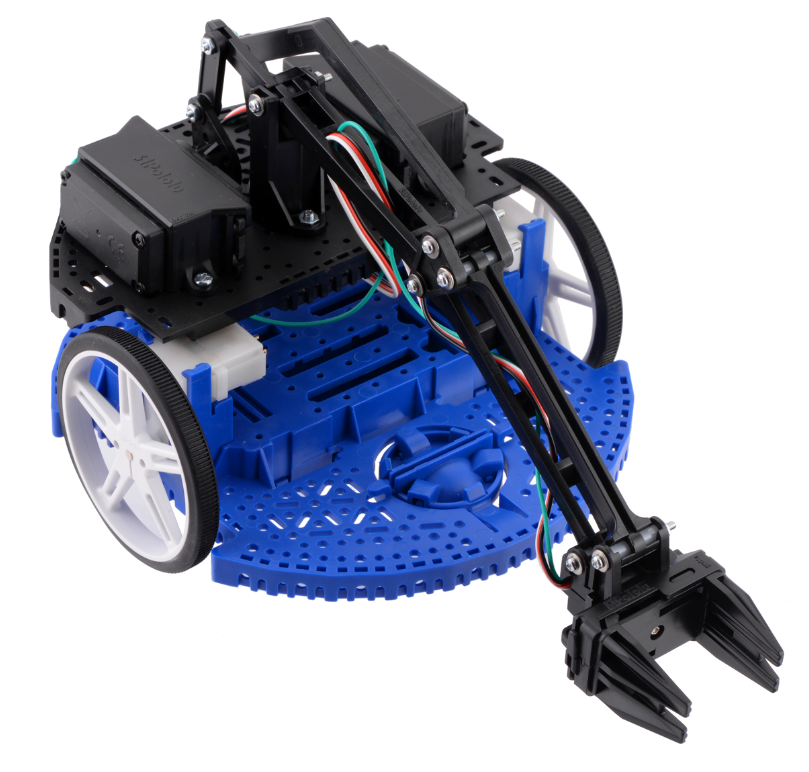

# ES302 Romi Pin Configuration

When working with the Romi in Arduino, you will need to know how the servo arm kit is wired in order to read the servo and proximity sensor feedback signals and send commands to the Romi's servo arms. The diagram below provides this information in red. Not shown are the connections to the bluetooth dongle, which uses pins 0 and 1 for serial communication. Serial communication with the bluetooth dongle can be accomplished by calling Serial1 instead of Serial in an Arduino sketch.

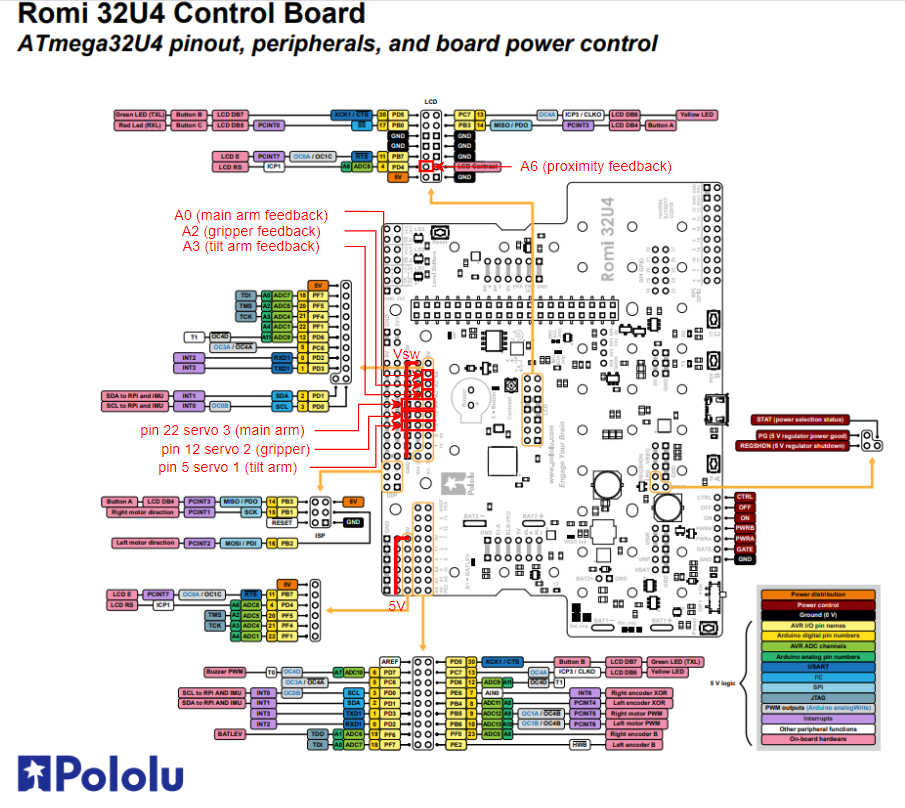

# Basic Interaction with Romi in Arduino

Basic interaction with Romi using the Arduino language can be accomplished by following the steps in the Romi User Guide to [set up your Arduino IDE](https://www.pololu.com/docs/0J69/5.2) and using the [Romi 32U4 Library](https://github.com/pololu/romi-32u4-arduino-library) to talk to the Romi's motors, buttons, and encoders. 

However, the Romi robots in ES302 are also equipped with the robot arm kit, which you can read about [here](https://www.pololu.com/docs/0J76), and a custom-made proximity sensor. You can read about proximity sensors in our open-source textbook in section 7.5.1.

These 'extras' mean that working with our Romis in Arduino is slightly different than any of the examples that come with the Romi library, so a code is provided below to illustrate the functionality of the ES302 Romis.

Note that the code uses a library called "Servo3," which I have written for the Romi to avoid conflicting with the operation of its wheel motors. You can download that library [here](https://github.com/Alexanderallenbrown/Servo3) and if you need help with Arduino or with installing libraries, you should consult the [Arduino Resource](../01_Background_Resources/01D_Arduino_resource.ipynb) notebook. 

```c++
#include <Servo3.h> //if you don't have this, download it!
#include <Romi32U4.h>

Romi32U4Encoders encoders;
Romi32U4Motors motors;
//servo object
Servo3 m1;
Servo3 m2;
Servo3 m3;

int16_t countsLeft;
int16_t countsRight;
int16_t leftCommand;
int16_t rightCommand;
int16_t m1Command = 90;
int16_t m2Command = 90;
int16_t m3Command = 90;
int16_t proxVal;
int16_t m1fb;
int16_t m2fb;
int16_t m3fb;

void setup() {
  // attach servos on requisite pins
  //servo 1 (tilt) is attached to pin 5
  m1.attach(5);
  //servo 2 (gripper) is attached to pin 12
  m2.attach(12);
  //servo 3 (main arm) is attached to pin 22
  m3.attach(22);
  //IR emitter is attached to pin 13
  pinMode(13, OUTPUT);
  //turn on the LED so we can use the prox sensor
  digitalWrite(13, HIGH);

  //begin Serial communication
  Serial.begin(115200);
}

void loop() {
  // read sensors on Romi
  countsLeft = encoders.getCountsLeft();
  countsRight = encoders.getCountsRight();
  proxVal = analogRead(6);
  m1fb = analogRead(3);
  m2fb = analogRead(2);
  m3fb = analogRead(0);

  //get current time in seconds
  float curtime = millis() / 1000.0;
  //now create a command for each of the motors/servos
  leftCommand = 75 * sin(curtime);
  rightCommand = 75 * sin(curtime);
  m1Command = 10 * sin(curtime) + 90;
  m2Command = 90 + 90 * sin(curtime);
  m3Command = 20 * sin(curtime) + 90;

  //now send commands to the motors/servos
  motors.setLeftSpeed(leftCommand);
  motors.setRightSpeed(rightCommand);
  m1.write(m1Command);
  m2.write(m2Command);
  m3.write(m3Command);

  //now send feedback to the serial monitor for us to see
  Serial.print(leftCommand);
  Serial.print(",");
  Serial.print(rightCommand);
  Serial.print(",");
  Serial.print(m1Command);
  Serial.print(",");
  Serial.print(m2Command);
  Serial.print(",");
  Serial.print(m3Command);
  Serial.print(",");
  Serial.print(countsLeft);
  Serial.print(",");
  Serial.print(countsRight);
  Serial.print(",");
  Serial.print(m1fb);
  Serial.print(",");
  Serial.print(m2fb);
  Serial.print(",");
  Serial.print(m3fb);
  Serial.print(",");
  Serial.print(proxVal);
  Serial.println();

}
```


# Controlling Romi From a PC

Using the [ES302_Romi](https://github.com/Alexanderallenbrown/ES302_Romi) library, which you can download at the link, you can control a Romi from a wired or bluetooth serial connection. Documentation for the library is located [here](https://alexanderallenbrown.github.io/ES302_Romi), but the most important function you need to use in this library is "update;" details for that function are [here](https://alexanderallenbrown.github.io/ES302_Romi/class_romi_1_1_romi.html#a6c017ba137e796f962214059b22d29a5). 

An example code for controlling a Romi is provided with the library under examples/romi_sines.py

Before using this example, be sure to upload the romi_interface.ino Arduino script (available in the firmware/ folder of the ES302_Romi library folder) to the Romi using a *wired* USB serial connection.

Then, you can run the Romi python example. The code is reproduced below. Note how the Romi object is created using a specific COM port (in this caase, the COM port representing my bluetooth connection with the Romi's on-board HC-05 bluetooth chip). Notice as well how the program uses an infinite loop to send sine waves to the Romi's motors and servos, and then saves all command and feedback data to a file.

```python
import sys
#add ES302 directory to path because Romi.py is there
sys.path.append("../")
#now import Romi class from Romi.py
from Romi import Romi
#import time library so we can track elapsed time.
import time
from math import sin

#start a romi object on com 5
romi = Romi(port='COM5')

#open a file so we can save data.
f = open("data.txt","w")

starttime = time.time()
currtime = time.time()-starttime

while currtime<6.0:
    time.sleep(0.005)
    currtime = time.time()-starttime
    #send a sine wave motor command to the wheels
    motorspeed_amp = 75
    #send a sine wave velocity to both motors
    wheelcmd = int(motorspeed_amp*sin(currtime))
    #send sine waves to each servo too!
    s1cmd = int(10*sin(currtime)+90)
    s2cmd = int(90+90*sin(currtime))
    s3cmd = int(20*sin(currtime)+90)
    #update the simulated Romi with our commands:
    #commands: motor_left,motor_right,servo_1,servo_2,servo_3
    romi.update(wheelcmd,wheelcmd,s1cmd,s2cmd,s3cmd)
    #now collect data from the romi's sensors and save to a file!
    #make first few columns echo the commands:
    #write time and commands to file so we know what we asked the robot to do:
    string1 = format(currtime,'0.3f')+","+format(wheelcmd,'d')+","+format(wheelcmd,'d')+","+format(s1cmd,'d')+','+format(s2cmd,'d')+','+format(s3cmd,'d')+','
    #now write the feedback from the actual robot's sensors:
    f.write(romi.datastring)


romi.ser.close()
```

In order to use this example, you need a computer with python3 installed, in a folder where the ES302_Romi/Romi.py file is accessible, and you need the module "pyserial" installed. You also need to ensure that your Romi is paired with your PC, and that you know the COM port that corresponds with the bluetooth connection. On a Windows machine, like the ones in the lab, follow the steps to pair your Romi with the computer. You can do this from Bluetooth Settings, where you can click "add a device" to pair with the Romi. The Romis in our lab all have the pairing passcode "0000".

Once the Romi is paired, you can see what serial port(s) it created using Device Manager. Usually the first serial port labeled "bluetooth" in this list is the correct one; you want the "outgoing" port name, which indicates that the connection will be initiated by the computer.
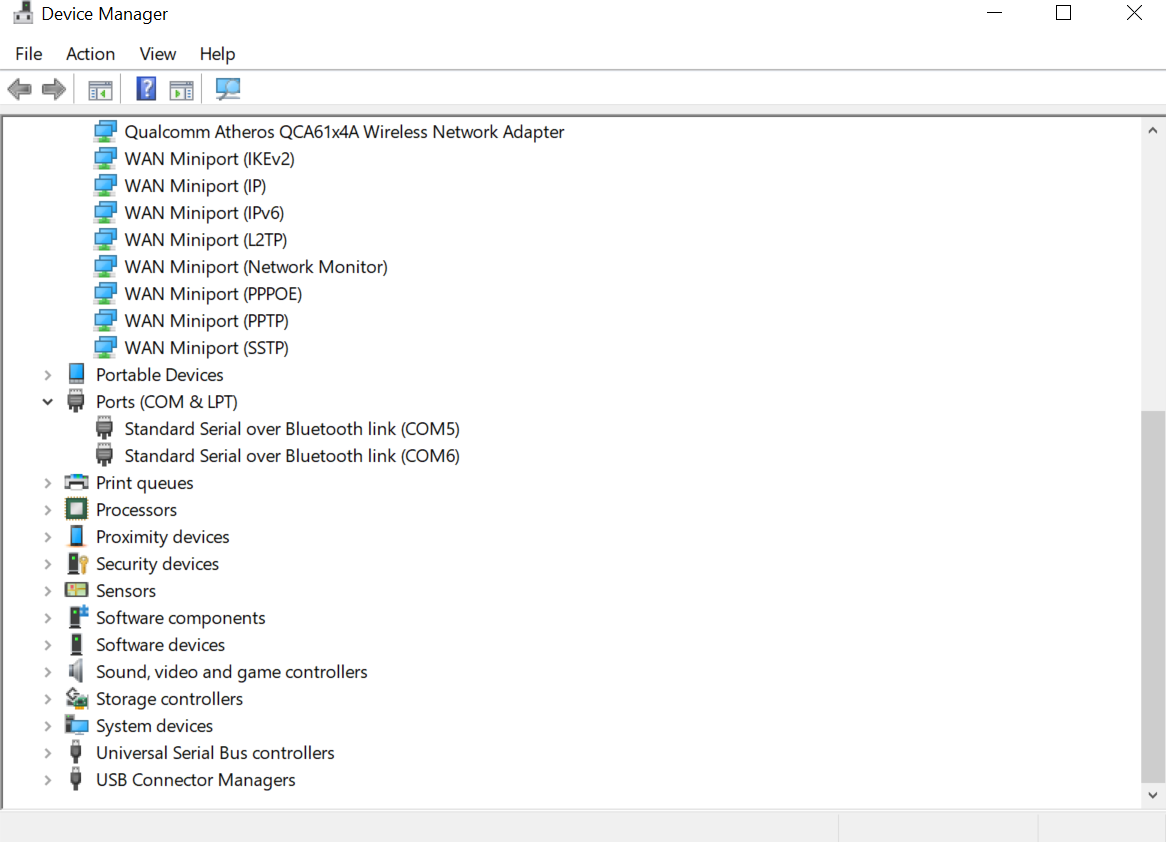

You can confirm which is the "outgoing" port by going to Bluetooth Settings in windows, then clicking "more Bluetooth Options" as shown below:
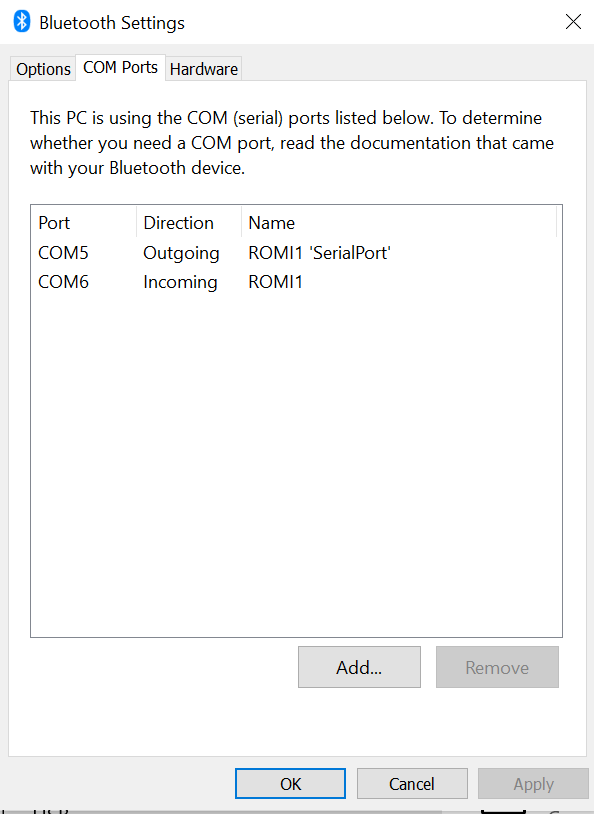

# Controlling a Simulated Romi in Webots

To control a simulated Romi from the Webots simulator, first download or clone the [ES302_Webots](https://github.com/Alexanderallenbrown/ES302_Webots) package from github. This package includes a version of the ES302_Romi library mentioned above. Then, open the file worlds/romi_demo.wbt in Webots.
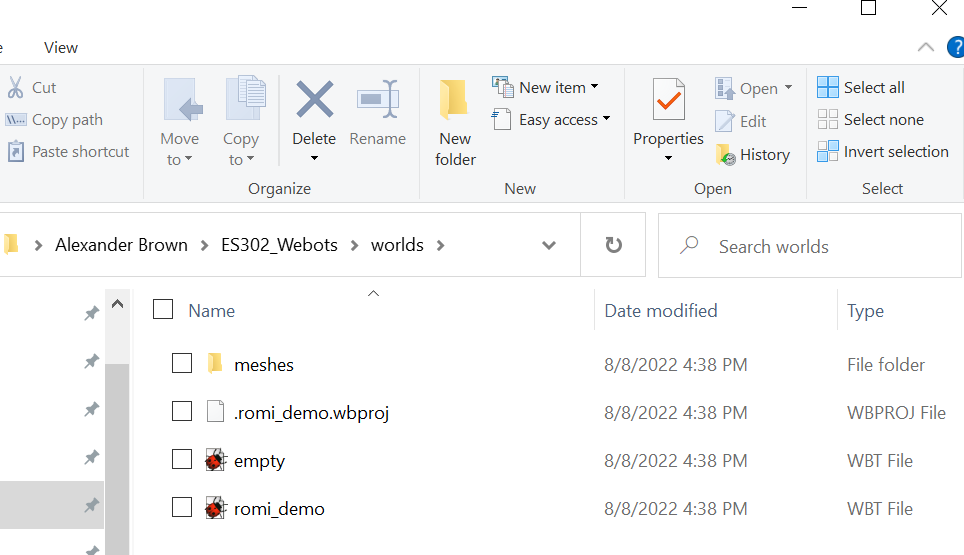

This should bring up a Webots window. This robot is controlled by the controller "romi_demo.py" which is inside the subfolder ES302_Webots/controllers/romi_demo/

The window will look like this:
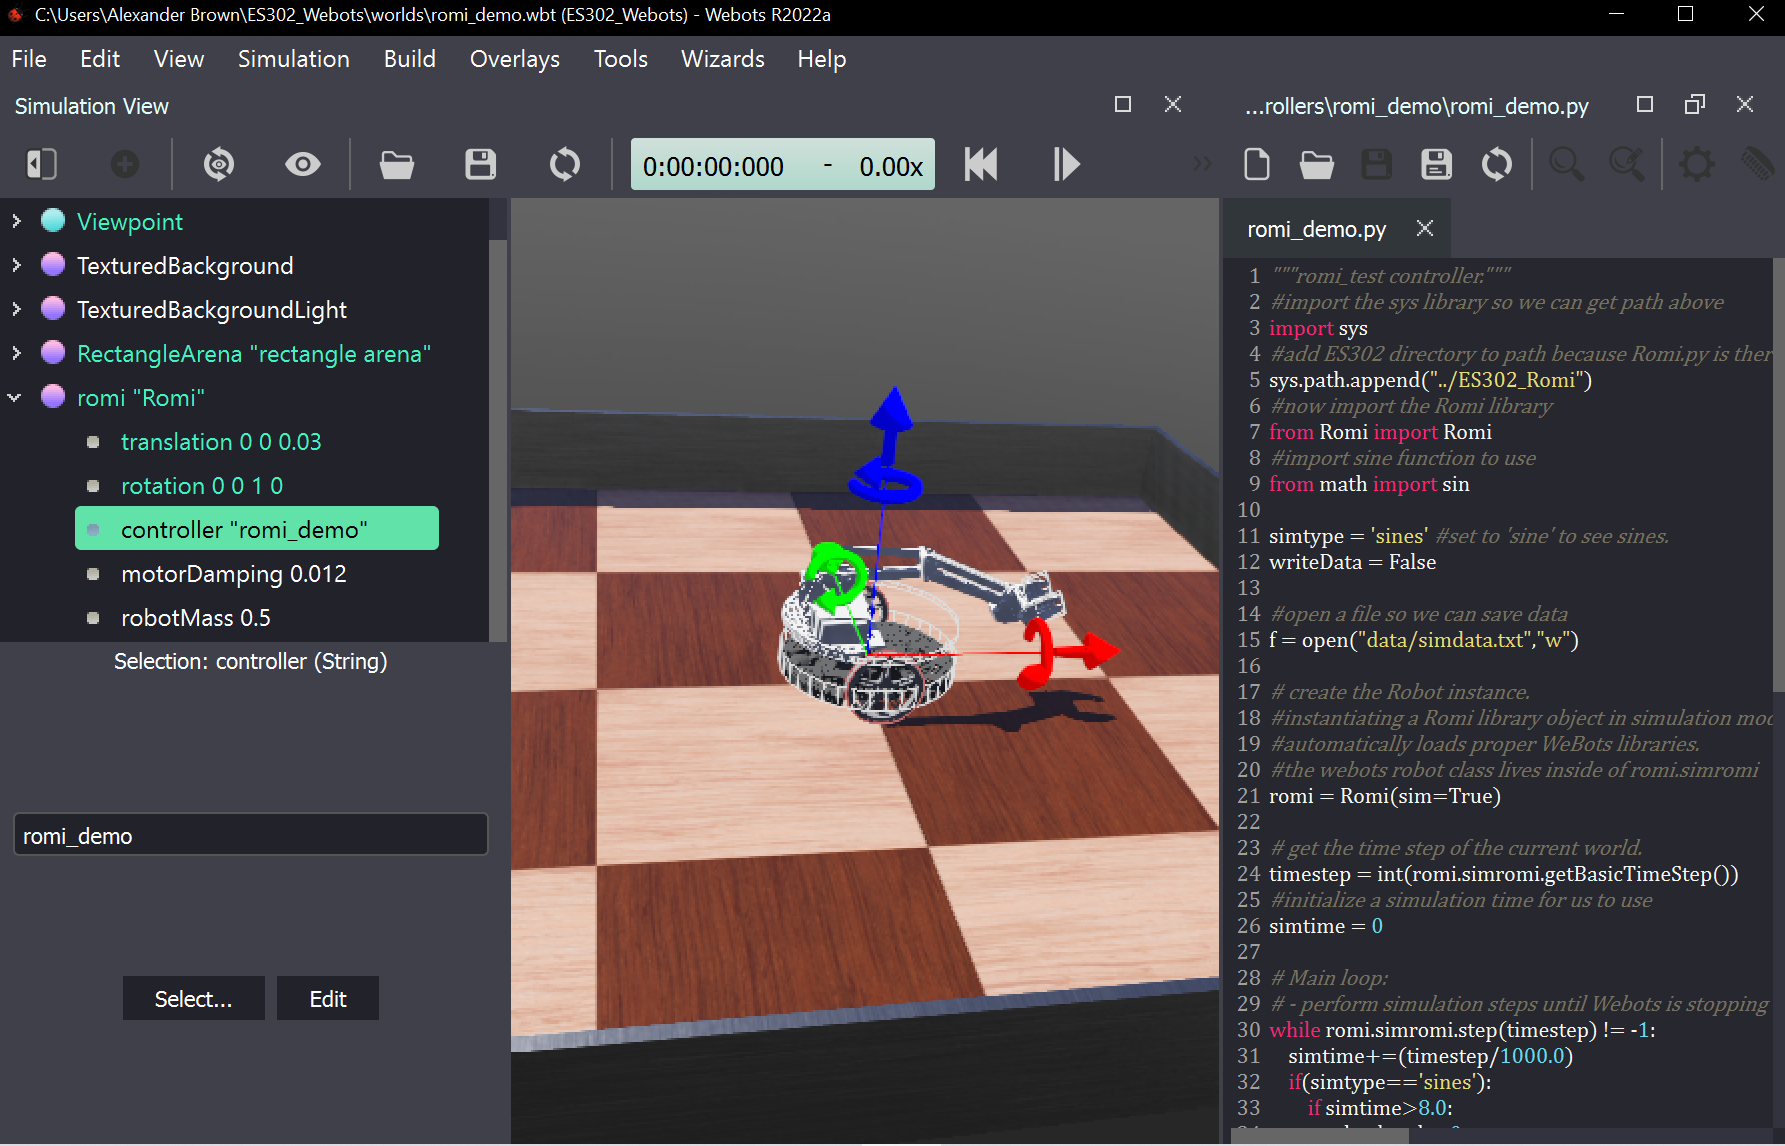

You can run the simulation using the "play" button, modify the controller file, or make a new controller file based on the demo. Inside the controller file itself, shown in the right panel above, you will see that the interface for the simulated Romi is almost identical to the interface to the real Romi (discussed in the preceding section). This allows us to run high-fidelity models of the romi and its environment to validate our robot's code before trying it "in real life."

# Working With Virtual and Physical Romi Robots in the Lab

To set up a virtual Romi robot in the Webots robot simulation software on lab computers (in AEC 500) please follow the instructions in the video below.

In [17]:
from IPython.display import YouTubeVideo
YouTubeVideo('UpCa67lEkus', width=800,height=600)

To set up a **real** Romi robot from the lockers in AEC 500 using one of the lab computers, please follow the instructions in the video below.

In [18]:
YouTubeVideo('kICScrBufZg',width=800,height=600)